<a href="https://colab.research.google.com/github/CLAUDERNORONHA/PROJETO/blob/main/Vendas_de_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para compartilhar minha compreensão dos conceitos e técnicas que conheço, vou pegar um exemplo do conjunto de dados Market Sales disponível no Kaggle e tentar obter o máximo de insights possível do conjunto de dados usando EDA. Eu obtive o conjunto de dados Market Sales do conjunto de dados do Omer Colakoglu.https://www.kaggle.com/omercolakoglu



Aqui está uma visão geral rápida das coisas que tentarei neste artigo:
 
  - Visão geral dos dados

  - Análise de variáveis ​​categóricas e numéricas
  
  - Análise de correlação
  
  -  Agrupamento e agregação de dados para alguns insights

  -  Visualização

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from openpyxl import Workbook

In [ ]:
df = pd.read_excel('MarketSales.xlsx')

In [ ]:
df.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,...,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,...,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,...,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,...,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [ ]:
df.tail()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,...,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
611103,511703.0,7.0,EKMEK 250 GR,134656,2017-03-18,1.0,0.9,0.9,0.89,66.0,...,374191,Mahmut BAYATGİL,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 09:39:54,2017-03-19 09:40:50,E
611104,511496.0,7.0,EKMEK 250 GR,134630,2017-03-18,1.0,0.9,0.9,0.89,7.0,...,656248,Gamze BOTUÇ,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 20:30:58,2017-03-19 20:31:17,K
611105,492612.0,7.0,EKMEK 250 GR,130100,2017-03-15,1.0,0.9,0.9,0.89,59.0,...,78643,Cengiz BEREKETÇİ,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-16 17:51:04,2017-03-16 17:51:18,E
611106,512343.0,7.0,EKMEK 250 GR,134762,2017-03-18,1.0,0.9,0.9,0.88,40.0,...,926041,Elifnur EGİNKAYA,NaN,NaN,GIDA,UNLU MAMÜLLER,EKMEK,2017-03-19 17:00:12,2017-03-19 17:01:20,K
611107,512179.0,3942.0,ETI 80 GR KARAM BITTER,134738,2017-03-18,1.0,1.9,1.9,1.76,74.0,...,241748,Hacer CANDEMİR,44,ETİ,GIDA,BÜSKİVİ ÇEREZ,BÜSKİVİ,2017-03-19 16:00:15,2017-03-19 16:00:37,K


In [ ]:
df.shape

(611108, 26)

In [ ]:
df.dtypes

ID                       float64
ITEMCODE                 float64
ITEMNAME                  object
FICHENO                    int64
DATE_             datetime64[ns]
AMOUNT                   float64
PRICE                    float64
LINENETTOTAL             float64
LINENET                  float64
BRANCHNR                 float64
BRANCH                    object
SALESMAN                  object
CITY                      object
REGION                    object
LATITUDE                 float64
LONGITUDE                float64
CLIENTCODE                object
CLIENTNAME                object
BRANDCODE                 object
BRAND                     object
CATEGORY_NAME1            object
CATEGORY_NAME2            object
CATEGORY_NAME3            object
STARTDATE         datetime64[ns]
ENDDATE           datetime64[ns]
GENDER                    object
dtype: object

In [ ]:
df.describe()

,ID,ITEMCODE,FICHENO,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,LATITUDE,LONGITUDE
count,6.111070e+05,603941.000000,611108.000000,611107.000000,611107.000000,611107.000000,611107.000000,611107.000000,611107.000000,6.111070e+05
mean,3.068463e+05,9012.469698,87348.360138,1.270204,3.959574,4.055741,3.735345,39.201544,39.314996,3.029614e+05
std,1.812597e+05,7423.501236,42041.919628,1.995301,6.683096,11.956075,10.817679,21.827203,1.584433,3.597321e+06
min,1.000000e+00,6.000000,15560.000000,0.001000,0.010000,0.010000,0.010000,1.000000,36.401800,2.641420e+01
25%,1.528645e+05,3269.000000,51857.000000,1.000000,1.000000,1.250000,1.110000,22.000000,37.866700,2.897700e+01
50%,3.056480e+05,5719.000000,87169.000000,1.000000,2.300000,2.430000,2.220000,40.000000,39.776700,3.179870e+01
75%,4.584295e+05,14780.000000,122269.000000,1.000000,4.650000,4.960000,4.580000,55.000000,41.005300,3.634980e+01
max,1.445622e+06,23602.000000,586470.000000,502.000000,1799.000000,4278.000000,3625.430000,81.000000,42.023100,4.302160e+07


In [ ]:
#Valores nulos 

df.isnull().sum()

ID                     1
ITEMCODE            7167
ITEMNAME            7167
FICHENO                0
DATE_                  1
AMOUNT                 1
PRICE                  1
LINENETTOTAL           1
LINENET                1
BRANCHNR               1
BRANCH                 1
SALESMAN               0
CITY                   1
REGION                 1
LATITUDE               1
LONGITUDE              1
CLIENTCODE         18348
CLIENTNAME         18365
BRANDCODE          35557
BRAND              35557
CATEGORY_NAME1      7167
CATEGORY_NAME2     27660
CATEGORY_NAME3    209459
STARTDATE              0
ENDDATE                0
GENDER             18365
dtype: int64

In [ ]:
#Porcentagem de valores nulos 

df.isnull().mean()

ID                0.000002
ITEMCODE          0.011728
ITEMNAME          0.011728
FICHENO           0.000000
DATE_             0.000002
AMOUNT            0.000002
PRICE             0.000002
LINENETTOTAL      0.000002
LINENET           0.000002
BRANCHNR          0.000002
BRANCH            0.000002
SALESMAN          0.000000
CITY              0.000002
REGION            0.000002
LATITUDE          0.000002
LONGITUDE         0.000002
CLIENTCODE        0.030024
CLIENTNAME        0.030052
BRANDCODE         0.058184
BRAND             0.058184
CATEGORY_NAME1    0.011728
CATEGORY_NAME2    0.045262
CATEGORY_NAME3    0.342753
STARTDATE         0.000000
ENDDATE           0.000000
GENDER            0.030052
dtype: float64

Com os métodos usados ​​acima, pode-se ver que existem 611107 linhas e 26 colunas no conjunto de dados. No conjunto de dados, é possível acessar a quantidade, preços e categorias dos produtos adquiridos pelos clientes, ao mesmo tempo, é possível visualizar quem comprou em qual loja e quando, e seus dados pessoais.
    
     -  Análise de variáveis ​​categóricas e numéricas

Estou tentando entender o que é categórico e qual é a variável cardinal, observando a frequência dos dados dentro das variáveis.

In [ ]:
[print(col, df[col].dtypes, df[col].nunique()) for col in df.columns]

ID float64 611107
ITEMCODE float64 9367
ITEMNAME object 9303
FICHENO int64 142612
DATE_ datetime64[ns] 89
AMOUNT float64 3549
PRICE float64 1244
LINENETTOTAL float64 3752
LINENET float64 4438
BRANCHNR float64 81
BRANCH object 81
SALESMAN object 1331
CITY object 81
REGION object 7
LATITUDE float64 80
LONGITUDE float64 80
CLIENTCODE object 49316
CLIENTNAME object 52803
BRANDCODE object 354
BRAND object 354
CATEGORY_NAME1 object 12
CATEGORY_NAME2 object 63
CATEGORY_NAME3 object 155
STARTDATE datetime64[ns] 134722
ENDDATE datetime64[ns] 137663
GENDER object 2


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Embora os tipos de variáveis ​​como clientcode e clientname sejam objetos, não os incluí em meu grupo de dados categóricos porque suas frequências são muito altas. 

Eu classifico categoricamente as variáveis ​​com uma frequência máxima de 360.

In [ ]:
cat_val = [col for col in df.columns if df[col]. dtypes == "O" and df[col].nunique() < 360  ]
cat_val

['BRANCH',
 'CITY',
 'REGION',
 'BRANDCODE',
 'BRAND',
 'CATEGORY_NAME1',
 'CATEGORY_NAME2',
 'CATEGORY_NAME3',
 'GENDER']

Eu incluí valores int e float com uma frequência menor que 100 em minhas variáveis ​​numéricas, mas categóricas.

In [ ]:
num_but_cat = [col for col in df.columns if df[col].dtype in [int, float] and df[col].nunique() < 100]

In [ ]:
cat_val = cat_val + num_but_cat

In [ ]:
cat_val

['BRANCH',
 'CITY',
 'REGION',
 'BRANDCODE',
 'BRAND',
 'CATEGORY_NAME1',
 'CATEGORY_NAME2',
 'CATEGORY_NAME3',
 'GENDER',
 'BRANCHNR',
 'LATITUDE',
 'LONGITUDE']

As variáveis ​​numéricas são "QUANTIA(AMOUNT)", "PREÇO (PRICE)", "LINENETTOTAL(LINENETTOTAL)", "LINENET".

In [ ]:
num_cols = [col for col in ["AMOUNT", "PRICE", "LINENETTOTAL", "LINENET"]]

num_cols

['AMOUNT', 'PRICE', 'LINENETTOTAL', 'LINENET']

Analise de Correlação 

In [ ]:
corr = df[num_cols].corr()
corr

,AMOUNT,PRICE,LINENETTOTAL,LINENET
AMOUNT,1.000000,-0.073027,0.418553,0.437718
PRICE,-0.073027,1.000000,0.489237,0.496955
LINENETTOTAL,0.418553,0.489237,1.000000,0.997764
LINENET,0.437718,0.496955,0.997764,1.000000


Valores de correlação (podemos ver que há alta correlação entre  "LINENET" e "LINENETTOTAL")

Correlação de visualização entre variáveis ​​numéricas

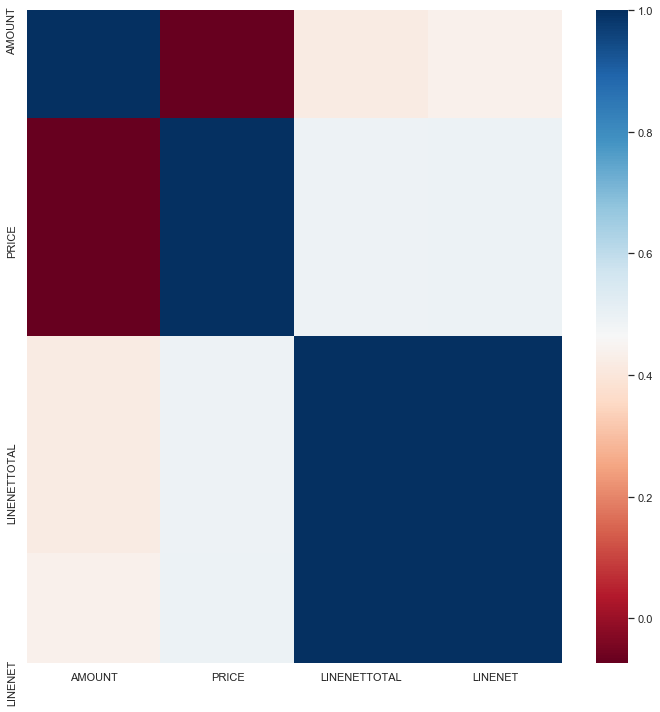

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(corr, cmap = "RdBu")
plt.show()

Para relação de exibição entre LINENET e LINENETTOTAL

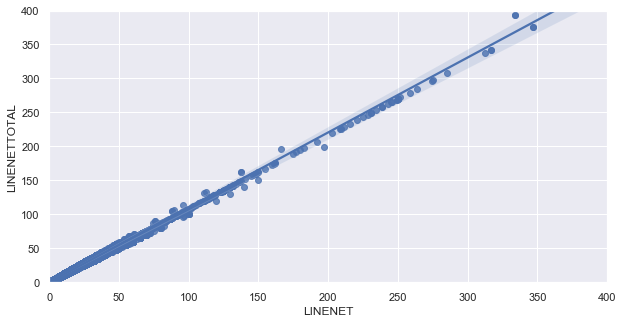

In [ ]:
plt.figure(figsize = (10,5)) 
sns.regplot(x = "LINENET", y = "LINENETTOTAL", data = df) 
plt.xlim(0,400) 
plt.ylim(0,400) 
plt.show()

Agrupamento e agragação de dados para alguns insights

In [ ]:
#Soma, Média, valores mínimos e máximos de LINNETOTAL por Gênero 

df[["LINENETTOTAL", "GENDER"]].groupby ("GENDER").agg({"LINENETTOTAL":["sum", "mean", "min", "max"]})

LINENETTOTAL                        
                 sum      mean   min     max
GENDER                                      
E       1.136059e+06  4.044974  0.01  4278.0
K       1.266157e+06  4.059678  0.01  2761.0

In [ ]:
#Montante totais por CATEGORY

df[["CATEGORY_NAME1", "AMOUNT"]].groupby(["CATEGORY_NAME1"]).agg({"AMOUNT":"sum"})

,AMOUNT
CATEGORY_NAME1,
BEBEK,6378.384
DETERJAN TEMİZLİK,23350.000
ET TAVUK,20656.821
EV,15080.000
GIDA,298364.886
KAĞIT,24539.000
KOZMETİK,23221.000
MEYVE SEBZE,110262.198
PET,35.000


In [ ]:
#Top 10 branches com a maior receita


df[["REGION","LINENETTOTAL"]].groupby(["REGION"]).agg({"LINENETTOTAL":"sum"}).sort_values("LINENETTOTAL",ascending = True).head(2)

,LINENETTOTAL
REGION,
Doğu Anadolu,181158.12
Güneydoğu Anadolu,262217.75


Total de vendas e médias de acordo com os dias da semana e finais de semana

In [ ]:
w_df = pd.DataFrame(pd.to_datetime(df['DATE_']))
w_df["WEEK_VARIABLE"] = w_df["DATE_"].dt.dayofweek
w_df["WEEKENDORNOT"] = ["WEEKEND" if week_variable > 4 else "WEEKDAY" for week_variable in w_df["WEEK_VARIABLE"]]
w_df["LINENETTOTAL"] = df["LINENETTOTAL"]

w_df[["LINENETTOTAL","WEEKENDORNOT"]].groupby("WEEKENDORNOT").agg({"LINENETTOTAL":["sum","mean"]})

LINENETTOTAL          
                       sum      mean
WEEKENDORNOT                        
WEEKDAY       1.806401e+06  4.072589
WEEKEND       6.720910e+05  4.011143

Top 10 vendedores com o maior total

In [ ]:
df[["SALESMAN","LINENETTOTAL"]].groupby(["SALESMAN"]).agg({"LINENETTOTAL":"sum"}).sort_values("LINENETTOTAL",ascending = False).head(10)

,LINENETTOTAL
SALESMAN,
Yunus Emre AVUZ,80067.73
Dilan TEMİÇİN,77508.01
Miraç VELİBEYOĞLU,76862.99
İsmet SARTIK,75761.03
Dilan ÇALAR,75371.30
Arife DORAP,72889.89
Meliha AKTEKE,22989.05
Gülten IŞLAK,22561.24
Rabia KARANFİL,22169.83


Top 10 CLIENT

In [ ]:
df[["CLIENTNAME","CLIENTCODE","LINENETTOTAL"]].groupby(["CLIENTNAME","CLIENTCODE"]).agg({"LINENETTOTAL":"sum"}).sort_values("LINENETTOTAL",ascending = False).head(10)

,,LINENETTOTAL
CLIENTNAME,CLIENTCODE,
İrfan KILIMBOZ,854889,8562.49
Gamze ÖZÇİMEN,9010,5609.19
Ali CENGİARSLAN,933,2969.24
Atakan OLGUN,237685,2175.98
Melisa URGANCI,659570,1796.69
Mustafa SEVİLİR,808718,1560.63
Aysun BÜYÜKKEÇECİ,474739,1194.24
Nazmiye AYDIL,420299,1077.99
Gamze HACMALZEMELERİ,878679,938.92


Graficos

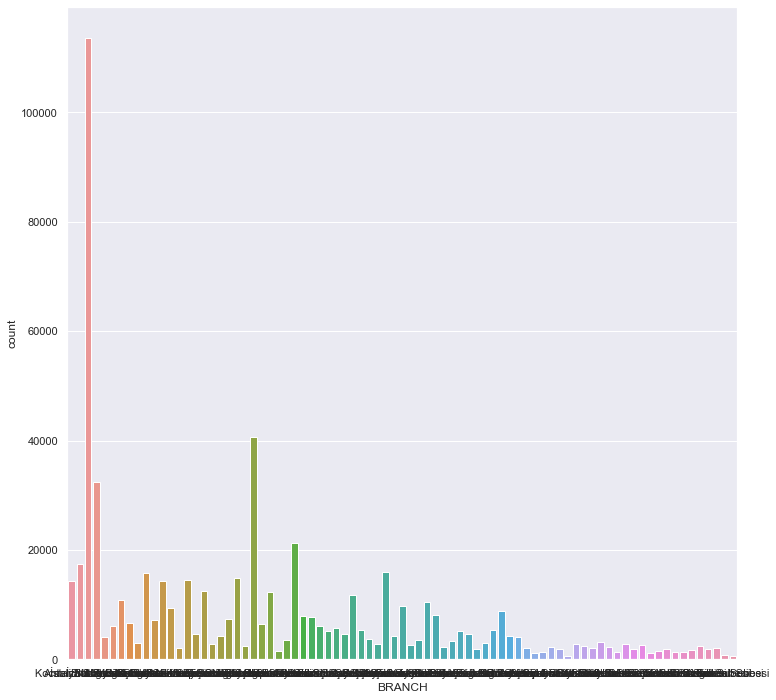

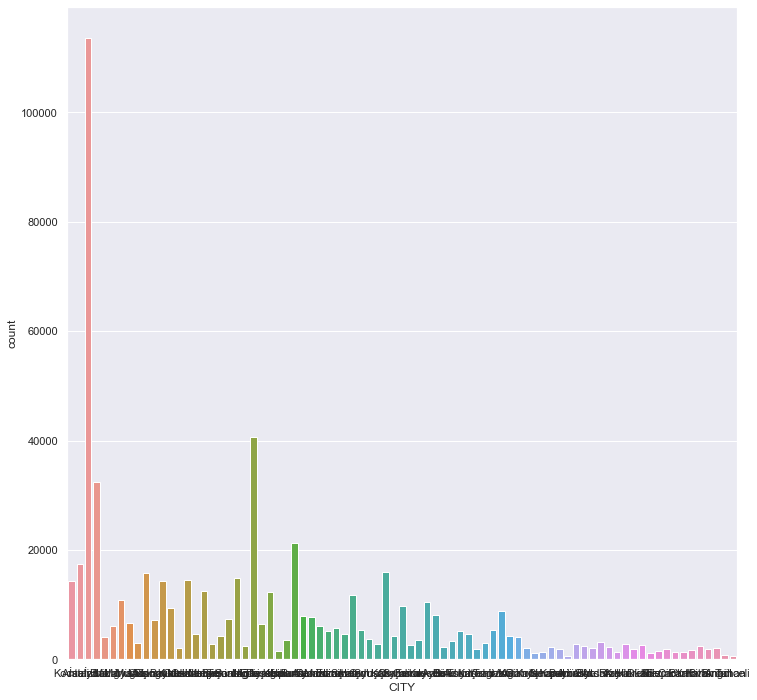

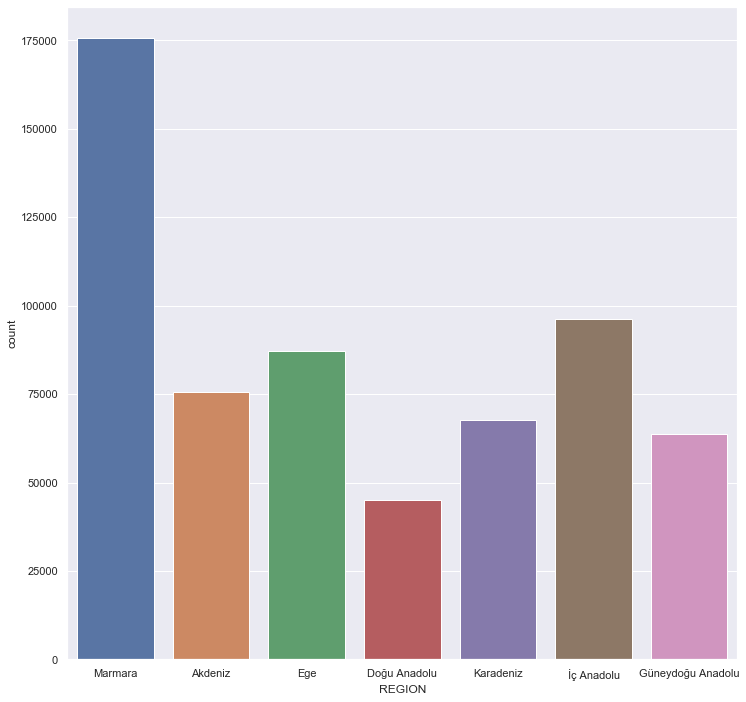

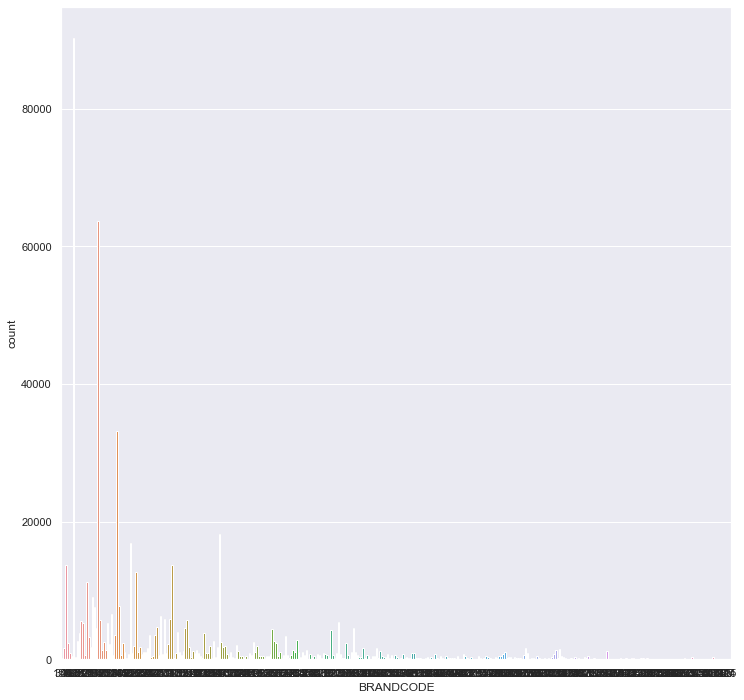

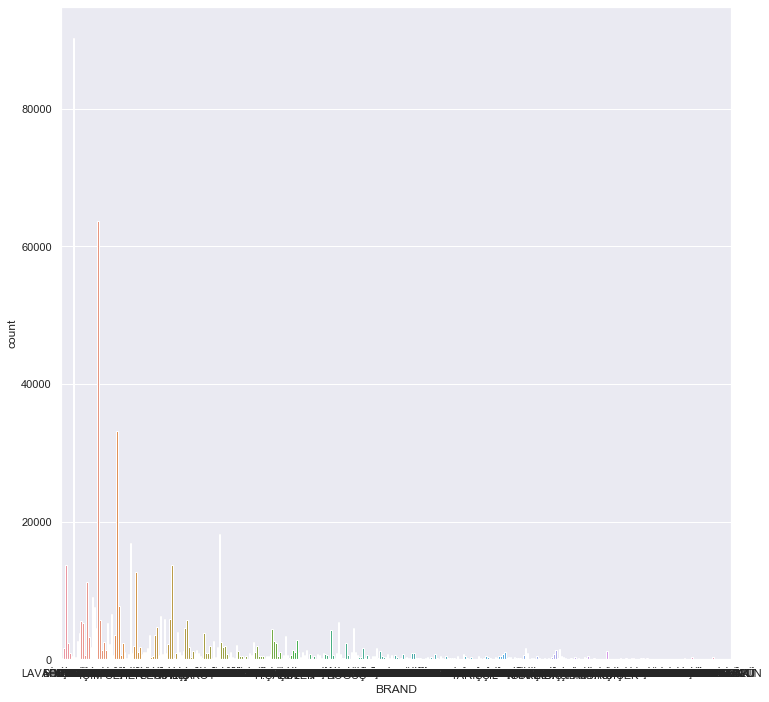

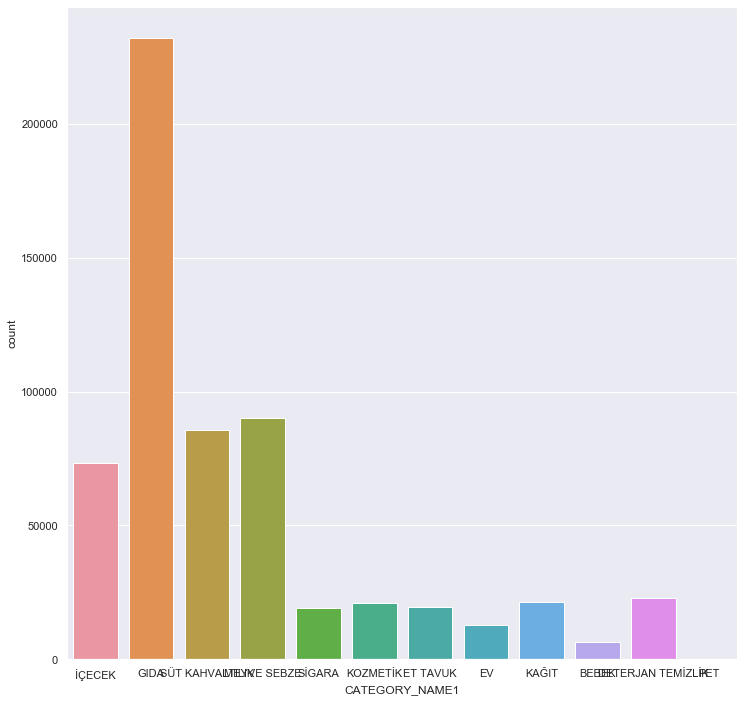

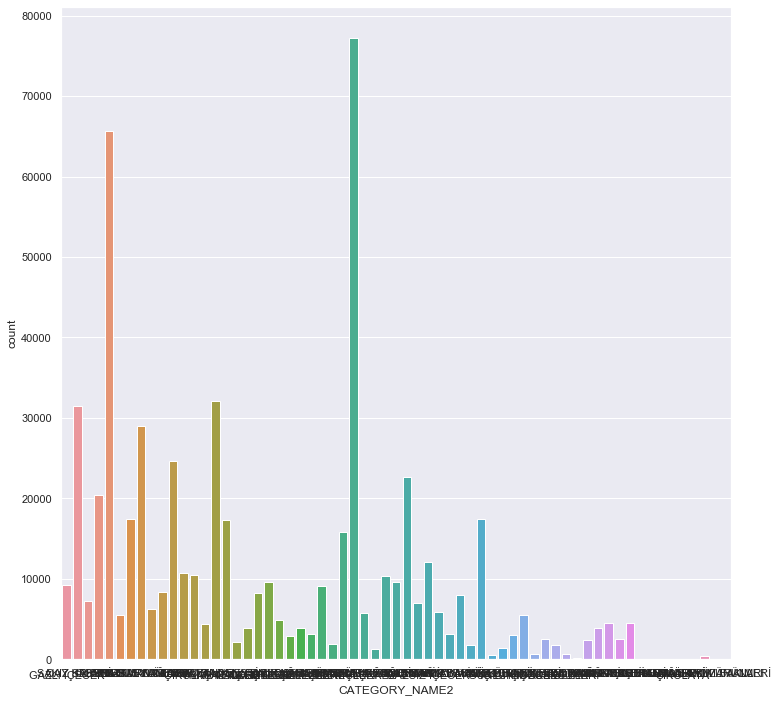

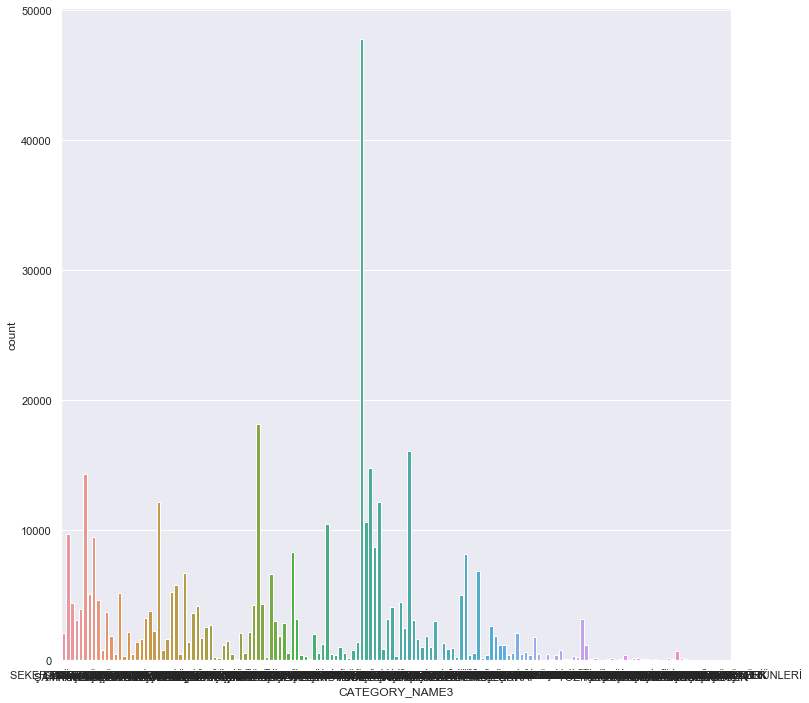

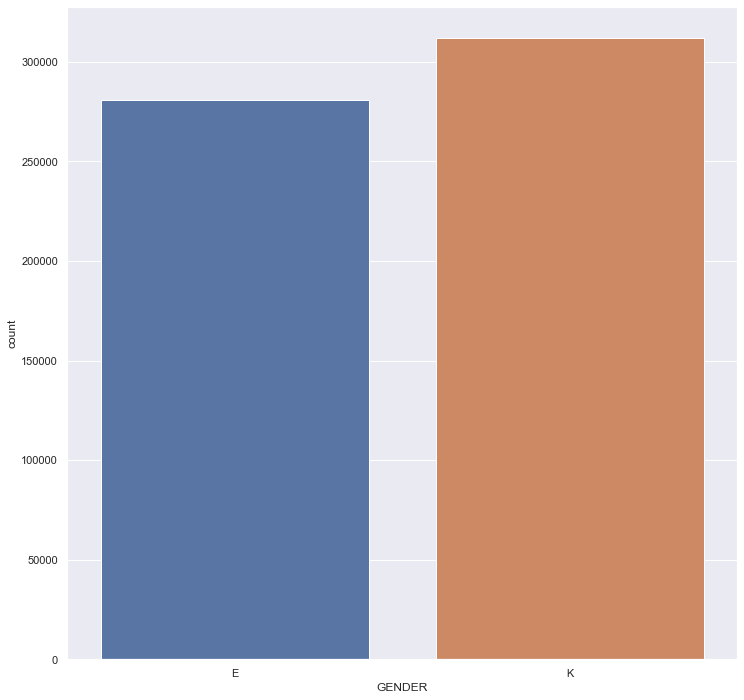

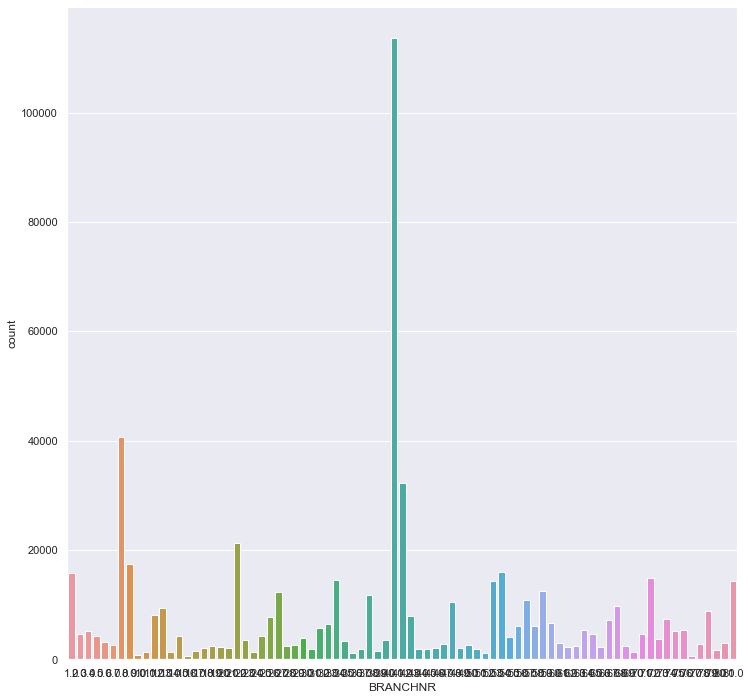

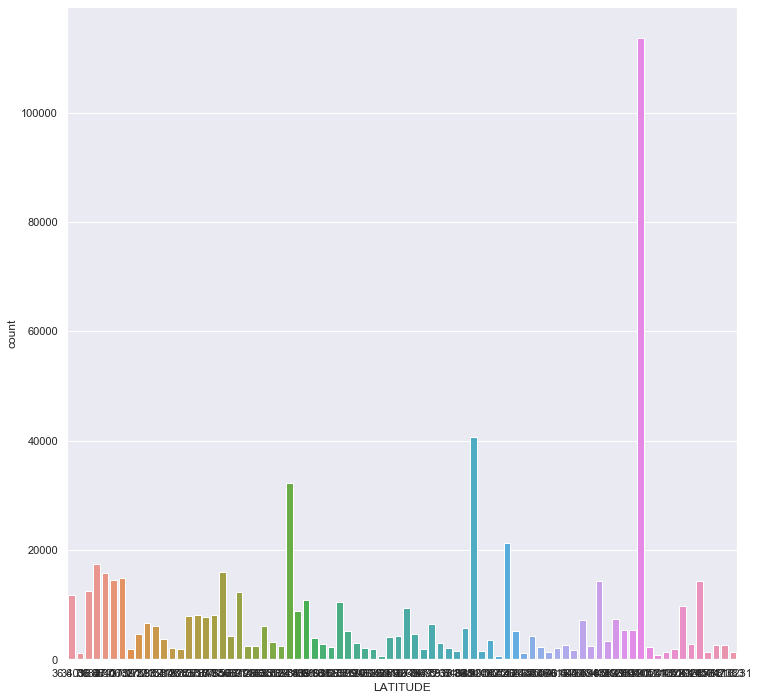

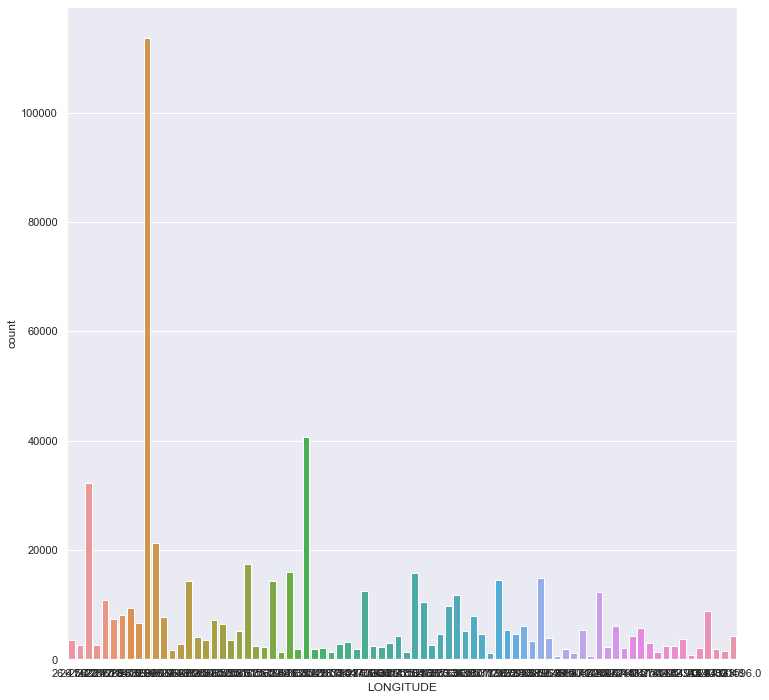

In [ ]:
#vizualização de variáveis 


for col in cat_val:
    sns.countplot(x=df[col], data=df)
    plt.show()


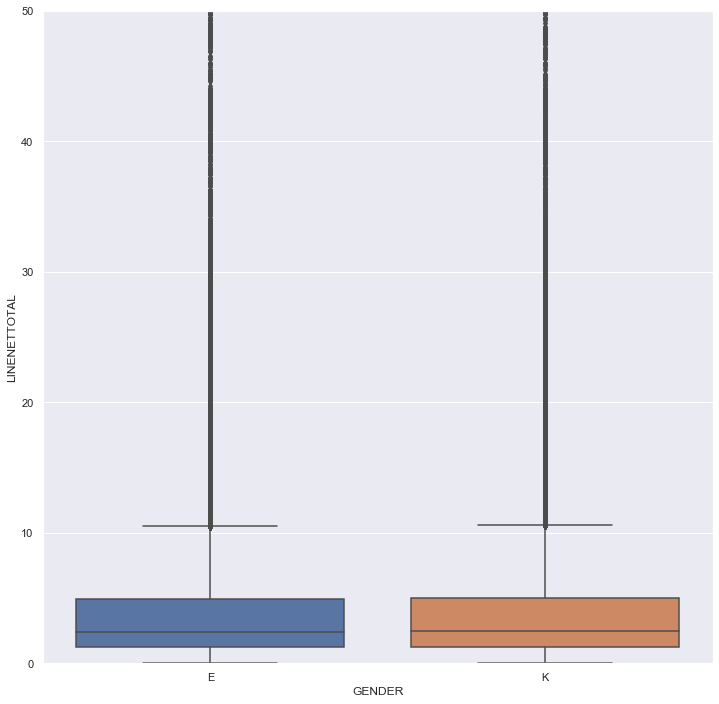

In [ ]:
#Distribuição por Gênero

sns.boxplot(x = df['GENDER'], y=df['LINENETTOTAL'])
plt.ylim(0,50)
plt.show()

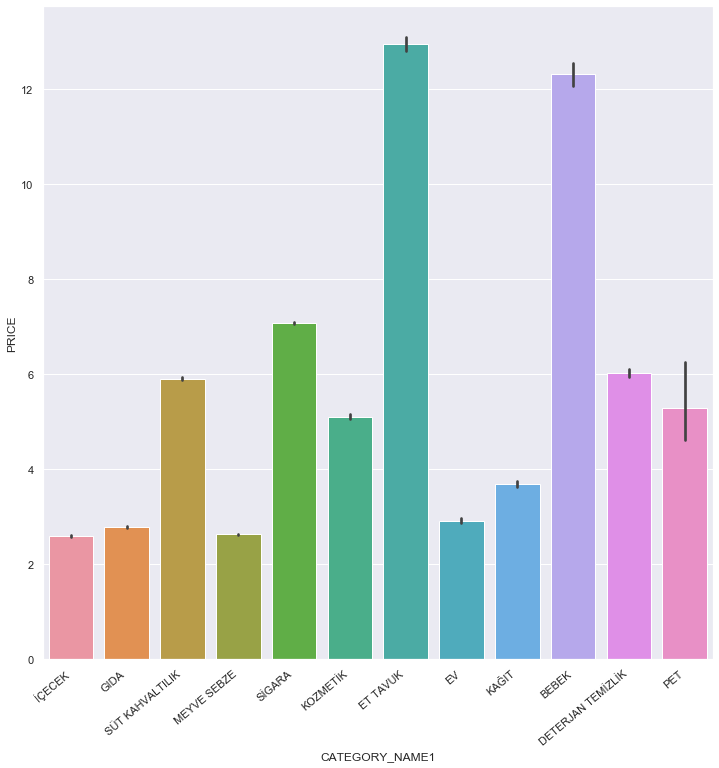

In [ ]:
#View price ranges of categories
ax = sns.barplot(x="CATEGORY_NAME1", y="PRICE", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()